랜덤포레스트
  - 앙상블 기법 : 여러개를 모아서 하나의 성능을 내는 기법
  - 부트스트랩 샘플링 : 각 트리를 만들때 데이터를 랜덤하게 다양한 셈플로 학습
  - 랜덤한 특성 선택 : 분할할때 랜던하게 선택된 일부 특성만 고려

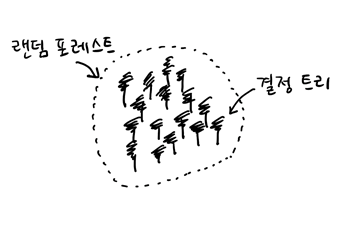

  - 과적합 방지 : 각 트리의 과적합을 완화시키는 역활
  - 안정성, 다양성 : 다양한데이터 와 특성을 사용